## Preprocessing

In [4]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import seaborn
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Resul Bozburun

# Read blog and non-blog datasets
df_blog_dataset = pd.read_csv('../data/blog-dataset-2k.csv')
df_nonblog_dataset = pd.read_csv('../data/nonblog-dataset-1k.csv')

# Concat data frames
data_frames = [df_blog_dataset, df_nonblog_dataset]
df = pd.concat(data_frames)

# Remove url attribıte. (Url attribute is unnecessary for model model Evaluation)
df.drop('url', axis=1, inplace=True)
df = shuffle(df)
df.head()

,isBlog,isWordpress,isBlogSpot,isUrlIncludeDate,isUrlIncludeDomainPostTitle,isUrlIncludeYearMonthPostTitle,urlLen,numOfKeywords,isIncludeBlog,isMetaTagIncludeBlogKeyword,isUrlSuffixHTML,domainLen,pathNumberCount,lenOfPath
389,1,0,1,1,0,1,69,3760,1,0,1,26,6,3
473,1,0,0,0,0,0,126,19499,0,0,0,26,0,2
431,1,0,0,0,0,0,80,6363,0,0,0,17,6,2
1650,1,0,1,1,0,1,83,32418,1,0,1,24,6,3
533,0,0,0,0,0,0,56,253877,0,0,0,13,8,4


## Normalization & Correlation

In [5]:
# Utku Sağocak
# data normalization
scaler = MinMaxScaler(feature_range = (0, 1))

df_scaled = scaler.fit_transform(df.to_numpy())

df = pd.DataFrame(df_scaled, columns=df.columns.values)
df.head()

,isBlog,isWordpress,isBlogSpot,isUrlIncludeDate,isUrlIncludeDomainPostTitle,isUrlIncludeYearMonthPostTitle,urlLen,numOfKeywords,isIncludeBlog,isMetaTagIncludeBlogKeyword,isUrlSuffixHTML,domainLen,pathNumberCount,lenOfPath
0,1.0,0.0,1.0,1.0,0.0,1.0,0.233645,0.006816,1.0,0.0,1.0,1.0000,0.084507,0.428571
1,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.035500,0.0,0.0,0.0,1.0000,0.000000,0.285714
2,1.0,0.0,0.0,0.0,0.0,0.0,0.285047,0.011560,0.0,0.0,0.0,0.4375,0.084507,0.285714
3,1.0,0.0,1.0,1.0,0.0,1.0,0.299065,0.059045,1.0,0.0,1.0,0.8750,0.084507,0.428571
4,0.0,0.0,0.0,0.0,0.0,0.0,0.172897,0.462649,0.0,0.0,0.0,0.1875,0.112676,0.571429


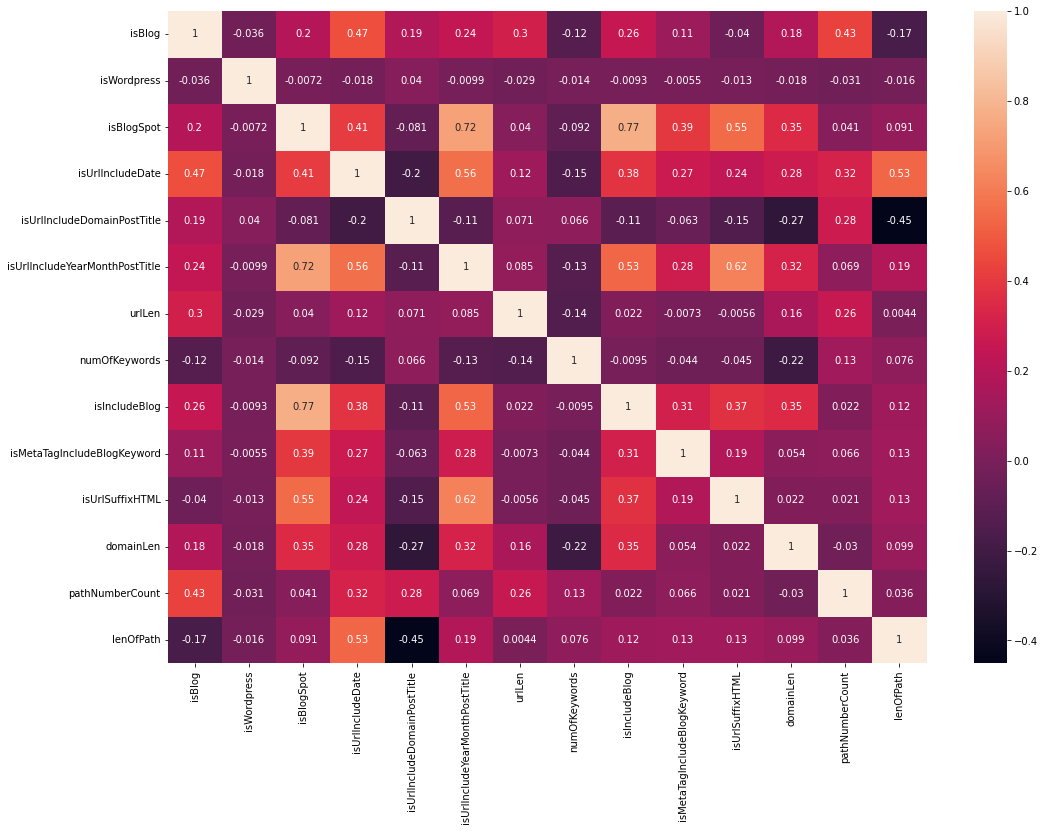

In [6]:
# Utku Sağocak

pyplot.figure(figsize=(17,12))
seaborn.heatmap(df.corr(), annot=True)
pyplot.show()

In [7]:
# isUrlIncludeDomainPostTitle attribute removed because heatmap shows us isUrlIncludeDomainPostTitle attribute has not any correlation with any other attribute. 
df.drop('isUrlIncludeDomainPostTitle', axis=1, inplace=True)

## Split Data

In [8]:
# Utku Sağocak

X = df.drop("isBlog", axis=1)
y = df["isBlog"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Model Evaluation

### KNeighbors

In [9]:
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

y_preds = neigh.predict(X_test)
accuracy_score(y_test, y_preds)

0.9908443540183113

### C-Support Vector

In [10]:
svc = SVC()
svc.fit(X_train, y_train)

y_preds = svc.predict(X_test)
accuracy_score(y_test, y_preds)

0.8901322482197355

### Decision Tree

In [11]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)


y_preds = dtree.predict(X_test)
accuracy_score(y_test, y_preds)

0.9816887080366226

###  Gaussian Naive Bayes

In [12]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)


y_preds = gnb.predict(X_test)
accuracy_score(y_test, y_preds)

0.6408952187182095